<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Directions-for-homework-submission" data-toc-modified-id="Directions-for-homework-submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Directions for homework submission</a></span></li><li><span><a href="#Order-of-magnitude-neuroscience:-Auditory-Sensitivity-(10-pts)" data-toc-modified-id="Order-of-magnitude-neuroscience:-Auditory-Sensitivity-(10-pts)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Order of magnitude neuroscience: Auditory Sensitivity (10 pts)</a></span><ul class="toc-item"><li><span><a href="#Bonus-(20-pts)" data-toc-modified-id="Bonus-(20-pts)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bonus (20 pts)</a></span></li></ul></li><li><span><a href="#Perceptron-&amp;-Hebbian-Learning-rules-(total-70-pts)" data-toc-modified-id="Perceptron-&amp;-Hebbian-Learning-rules-(total-70-pts)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perceptron &amp; Hebbian Learning rules (total 70 pts)</a></span><ul class="toc-item"><li><span><a href="#Construct-perceptrons-(30-pts)" data-toc-modified-id="Construct-perceptrons-(30-pts)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Construct perceptrons (30 pts)</a></span></li><li><span><a href="#A-different-classification-task-(20-pts)" data-toc-modified-id="A-different-classification-task-(20-pts)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>A different classification task (20 pts)</a></span></li><li><span><a href="#Digit-discrimination-(20-pts)" data-toc-modified-id="Digit-discrimination-(20-pts)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Digit discrimination (20 pts)</a></span></li></ul></li></ul></div>

# Directions for homework submission

Submit each of your homework to canvas as the pdf output of the jupyter notebook, and the jupyter notebook (.ipynb). Name your files starting in the format of "Last_name_First_name_File_name" separated by underscores. 

For example, Jieyu submits two files for her homework this week: 
1. Zheng_Jieyu_HW1.pdf (the pdf output of the jupyter notebook)
    
    If you have problems rendering your notebook into pdf, you can open your notebook in a browser and print -> save as pdf. 

2. Zheng_Jieyu_HW1.ipynb

**Please make sure your notebook can be run without errors within the cns187 virtual environment.** Any file that fails to be executed on TA's end will be considered as late submissions. 

**Caltech Honor code:** Searching for the solutions online is strictly prohibited. You should refer to the textbooks and lecture slides. If you are citing any external sources online, please include a list of references. 

**Collaboration on homework assignments is encouraged.** However, **you cannot show each other the numerical answers or codes**. Please note at the beginning of each answer whom you have discussed the problems with (including TAs). 

**All the mathematics should be typed in Latex format.** You may work on a piece of paper and then type it into the notebook. Here is a useful [cheat sheet](http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf). Please do not submit pictures of handwritten maths. 

**For the schematic and drawings to be submitted,** please display the images in markdown cells in your homework amd make sure they show up in your pdf rendering. 

**Please make sure that all your plots include a title and axis labels with units.** **One point will be deducted for each missing element.**

------------

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Order of magnitude neuroscience: Auditory Sensitivity (10 pts)

What kind of temporal sensitivity would be needed to be able to tell apart whether a sound comes from the left or the right? 

Based on what you have learned from the lectures so far, how can the auditory system detect such time delay? 

Hint: use the typical head size for question 1.  

The typical head size is $56$ cm, giving $$ 56 = \pi\cdot d$$ $$ d = 17.825 \\ \\ $$ Speed of Sound is $34019.744\frac{cm}{s}$

Time Delay = $17.825 \div 34019.744 \approx 0.000524$ seconds

Such a small time delay can be detected by seeing deviations in chemical and physical properties that occur as a result of the sound stimulus.

## Bonus (20 pts) 

Do an experiment to measure how well you can localize a sound source. Blind fold yourself, and point to the voice of a partner or the sound from a speaker across the room. Then spin around once and do it again 10 times or so. Compute the standard deviation across trials of your pointing angle as a measure of localization precision. Then calculate the time delay between the two ears that corresponds to this pointing precision. 

Hint: include a diagram to show how you do the calculation. 

# Perceptron & Hebbian Learning rules (total 70 pts)

## Construct perceptrons (30 pts) 

Construct various versions of a perceptron that classifies 10 two-dimensional inputs ($\mathbf u$) according to whether their sum $\sum_a u_a$ is positive or negative. e.g. an input $\mathbf u$ could be (-0.2, 0.3), and the sum of it is 0.1,  larger than 0. 

Use a random set of binary inputs drawn from a uniform distribution [-1, 1] x [-1, 1] during training and compare the performance of the basic Hebb rule and the perceptron learning rule. Initialize your weight at zero. Generate another random set of inputs as your test set. 

Run the training process for 100 times (including generating a random set of input). 


**Refer to Long-term Memory Lecture 1 slides for equations**

- For the perceptron learning rule, refer to Slide 18. Use r = 0.1 for your learning rate. Look at on average how many iterations it takes for the perceptron learning rule to converge. At each iteration, calculate the fraction of errors for both the training set and test set. 
    
    (Hint: calculate errors by comparing the difference between the output of your perceptron and the ground truth from your training/test set. If you are copying code from CS156a, make sure your update rules are the same as the slides) Plot the average fraction of errors over iterations on the same plot.

- For the Hebbian learning rule, use the supervised method (no iterations needed). Plug in the second equation on Slide 19 (equation 8.47, in section 8.4 of the Dayan and Abbott's book). Here assume $N_s$ is the number of inputs (10), $N_u$ is the dimension of your input (3, as we need to include the bias term). Calculate the average fraction of errors for both the training set and the test set.  

In [2]:
def generate_point(dim=3):
    return np.concatenate((np.array([1]), np.random.uniform(-1, 1, size=(dim - 1,))))


class SimpleData:
    def classify_point(self, point: np.ndarray):
        return 1 if np.sum(point) > 0 else 0
    
    def __init__(self, num_points: int, dim=3):
        
        self.points = []
        self.dim = dim
        
        for _ in range(num_points):
            p = generate_point(dim)
            score = self.classify_point(p)
            self.points.append((p, score))
            

class Perceptron:
    def __init__(self, training_info: SimpleData, dim:int=3):
        self.w = np.zeros(dim)
        self.w_hebb = np.zeros(dim)
        self.training_info = training_info
        
    def check_point(self, p, hebb=False):
        score = 0
        
        if hebb:
            score = 1 if np.dot(self.w_hebb, p) > 0 else 0
        else:
            score = 1 if np.sum(self.w * p) > 0 else 0
        
        return score
    
    def train_error(self, hebb=False):
        gt_scores = [score for (p, score) in self.training_info.points]
        scores = []
        for (p, score) in self.training_info.points:
            if hebb:
                scores.append(self.check_point(p, hebb=True)) 
            else:
                scores.append(self.check_point(p))
        return np.count_nonzero(np.array(gt_scores) != np.array(scores)) / len(gt_scores)
    
    def test_error(self, test_info: SimpleData, hebb=False):
        gt_scores = [score for (p, score) in test_info.points]
        scores = []
        for (p, score) in test_info.points:
            if hebb:
                scores.append(self.check_point(p, hebb=True))
            else: 
                scores.append(self.check_point(p))
        return np.count_nonzero(np.array(gt_scores) != np.array(scores)) / len(gt_scores)
    
    def algo(self, iterations=25, lr=0.1, hebb=False):
        test_data = SimpleData(10, self.training_info.dim)
        if hebb:
            self.w_hebb = (1/self.training_info.dim) * np.sum([score*p for (p, score) in self.training_info.points], axis=0)
            return self.train_error(hebb=True), self.test_error(test_data, hebb=True)
        else:
            training_errors = []
            test_errors = []
            for _ in range(iterations):
                for p, score in self.training_info.points:
                    self.w += lr * (score - self.check_point(p)) * p
                training_errors.append(self.train_error())
                test_errors.append(self.test_error(test_data))
            return training_errors, test_errors
                    

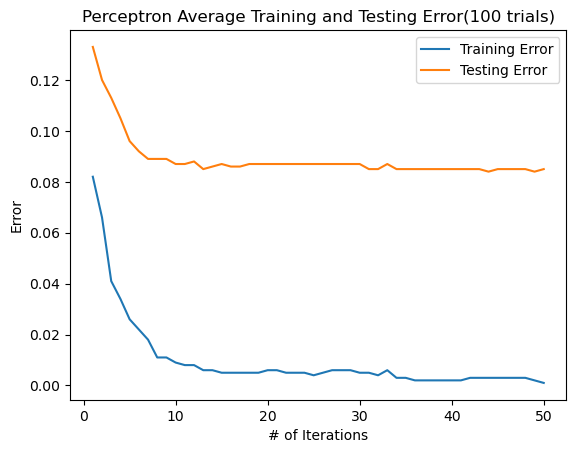

Average Hebbian Training Error over 100 trials: 0.11899999999999998
Average Hebbian Testing Error over 100 trials: 0.12300000000000001


In [3]:
trials = 100
iters = 50
training_errors = []
test_errors = []
training_errors_hebb = []
test_errors_hebb = []

for _ in range(trials):
    training_data = SimpleData(10, 3)
    pla = Perceptron(training_data)
    e_in, e_out = pla.algo(iterations=iters)
    e_in_hebb, e_out_hebb = pla.algo(hebb=True)
    training_errors.append(e_in)
    test_errors.append(e_out)
    training_errors_hebb.append(e_in_hebb)
    test_errors_hebb.append(e_out_hebb)

training_errors_avg = np.mean(training_errors, axis=0)
test_errors_avg = np.mean(test_errors, axis=0)

plt.plot(np.arange(1, iters+1), training_errors_avg)
plt.plot(np.arange(1, iters+1), test_errors_avg)
plt.xlabel("# of Iterations")
plt.ylabel("Error")
plt.legend(["Training Error", "Testing Error"])
plt.title("Perceptron Average Training and Testing Error(100 trials)")
plt.show()

print(f"Average Hebbian Training Error over 100 trials: {np.mean(training_errors_hebb)}")
print(f"Average Hebbian Testing Error over 100 trials: {np.mean(test_errors_hebb)}")



## A different classification task (20 pts) 

Repeat this training protocol, but this time attempt to make the output of the perceptron classify according to the parity of the inputs, which is the sign of their product $\prod_a u_a$. What is the number of iterations you need here? Why is this example so much harder than (1)? 

Hint: it could be helpful if you visualize the target function (the line that separates the points) and the points for both (1) and (2). 



In [4]:
class ParityData(SimpleData):
    def classify_point(self, point: np.ndarray):
        return 1 if np.sign(np.prod(point)) > 0 else 0
    
    def __init__(self, num_points: int, dim:int=3):
        super().__init__(num_points, dim)
        
class ParityPerceptron(Perceptron):
    def __init__(self, training_info: ParityData, dim:int=3):
        super().__init__(training_info, dim)
        
    def check_point(self, p, hebb=False):
        return super().check_point(p, hebb=hebb)
    
    def train_error(self, hebb=False):
        return super().train_error(hebb=hebb)
    
    def test_error(self, test_info: SimpleData, hebb=False):
        return super().test_error(test_info, hebb=hebb)
    
    def algo(self, iterations=25, lr=0.1, hebb=False):
        test_data = ParityData(10, self.training_info.dim)
        if hebb:
            self.w_hebb = (1/self.training_info.dim) * np.sum([score*p for (p, score) in self.training_info.points], axis=0)
            return self.train_error(hebb=True), self.test_error(test_data, hebb=True)
        else:
            training_errors = []
            test_errors = []
            for _ in range(iterations):
                for p, score in self.training_info.points:
                    self.w += lr * (score - self.check_point(p)) * p
                training_errors.append(self.train_error())
                test_errors.append(self.test_error(test_data))
            return training_errors, test_errors


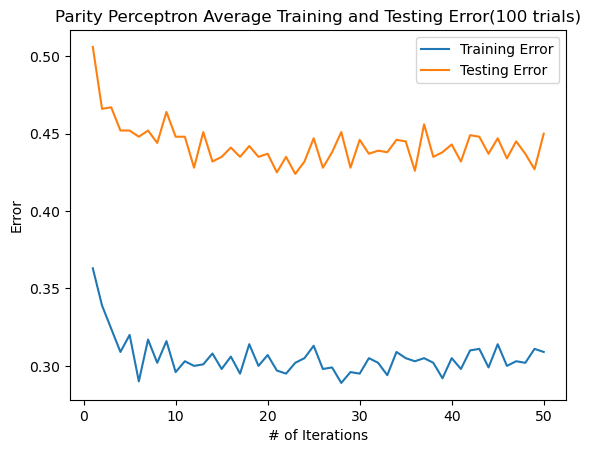

Average Parity Hebbian Training Error over 100 trials: 0.49200000000000005
Average Parity Hebbian Testing Error over 100 trials: 0.499


In [5]:
trials = 100
iters = 50
training_errors = []
test_errors = []
training_errors_hebb = []
test_errors_hebb = []

for _ in range(trials):
    training_data = ParityData(10, 3)
    pla = ParityPerceptron(training_data)
    e_in, e_out = pla.algo(iterations=iters)
    e_in_hebb, e_out_hebb = pla.algo(hebb=True)
    training_errors.append(e_in)
    test_errors.append(e_out)
    training_errors_hebb.append(e_in_hebb)
    test_errors_hebb.append(e_out_hebb)

training_errors_avg = np.mean(training_errors, axis=0)
test_errors_avg = np.mean(test_errors, axis=0)

plt.plot(np.arange(1, iters+1), training_errors_avg)
plt.plot(np.arange(1, iters+1), test_errors_avg)
plt.xlabel("# of Iterations")
plt.ylabel("Error")
plt.legend(["Training Error", "Testing Error"])
plt.title("Parity Perceptron Average Training and Testing Error(100 trials)")
plt.show()

print(f"Average Parity Hebbian Training Error over 100 trials: {np.mean(training_errors_hebb)}")
print(f"Average Parity Hebbian Testing Error over 100 trials: {np.mean(test_errors_hebb)}")

This is because _____

## Digit discrimination (20 pts) 

Train your two perceptrons to discriminate two handwritten digits 1 and 5. (Download the MNIST dataset from https://s3.amazonaws.com/img-datasets/mnist.pkl.gz, and unzip it in your project directory.) Plot the weights of your perceptrons and compare (Hint: the dimensions of the plot should be the same as the images of the digits.) (You can use `pickle.load`.) 

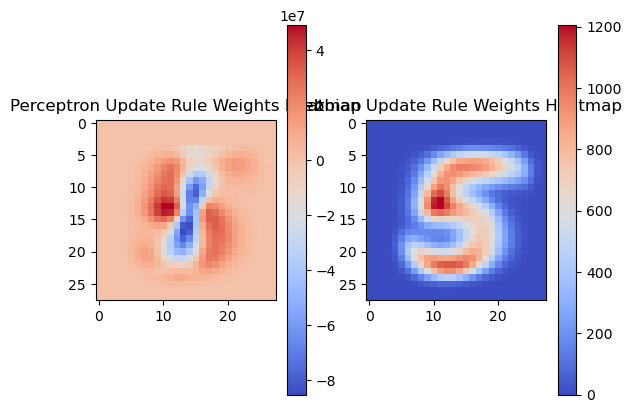

In [6]:
mnist = pickle.load(open("mnist.pkl", "rb"), encoding="latin1")
train_data, train_labels, test_data, test_labels = mnist[0][0], mnist[0][1], mnist[1][0], mnist[1][1]

train_data = train_data[(train_labels == 1) | (train_labels == 5)]
train_labels = train_labels[(train_labels == 1) | (train_labels == 5)]
test_data = test_data[(test_labels == 1) | (test_labels == 5)]
test_labels = test_labels[(test_labels == 1) | (test_labels == 5)]

train_labels[train_labels == 1] = 0
train_labels[train_labels == 5] = 1
test_labels[test_labels == 1] = 0
test_labels[test_labels == 5] = 1

def check_point(w, img, bias):
    return 1 if np.sum(np.dot(w, img) + bias) > 0 else 0

lr = 0.1

w = np.zeros(train_data[0].shape)
b = 0

iters = 1000
for _ in range(iters):
    for img,label in zip(train_data, train_labels):
        w += lr * (label - check_point(w, img, b)) * img
        b += lr * label
        
w_hebb = (1/(train_data.shape[1]*train_data.shape[2])) * np.sum([label*img for (img, label) in zip(train_data, train_labels)], axis=0)
            
fig, (ax, ax_hebb) = plt.subplots(1, 2)
im = ax.imshow(w.reshape(train_data[0].shape), cmap='coolwarm')
fig.colorbar(im, ax=ax)
im_hebb = ax_hebb.imshow(w_hebb.reshape(train_data[0].shape), cmap='coolwarm')
fig.colorbar(im_hebb, ax=ax_hebb)
fig.subplots_adjust(hspace=100)
ax.set_title("Perceptron Update Rule Weights Heatmap")
ax_hebb.set_title("Hebbian Update Rule Weights Heatmap")
plt.show()

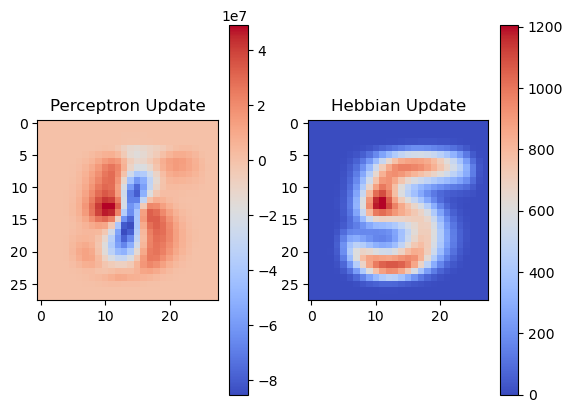

In [14]:
fig, (ax, ax_hebb) = plt.subplots(1, 2)
im = ax.imshow(w.reshape(train_data[0].shape), cmap='coolwarm')
fig.colorbar(im, ax=ax)
im_hebb = ax_hebb.imshow(w_hebb.reshape(train_data[0].shape), cmap='coolwarm')
fig.colorbar(im_hebb, ax=ax_hebb)
fig.subplots_adjust(hspace=1)
ax.set_title("Perceptron Update")
ax_hebb.set_title("Hebbian Update")
plt.show()